In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from time import time
import math

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class Perceptron:
    def __init__(self,rate,iteraciones):
        self.rate = rate
        self.iteraciones = iteraciones
        
    ### B- Perceptron    
    def train(self,x_train, y_expected):
        self.numAtributes = x_train.shape[1]
        self.weights = np.empty(self.numAtributes)
        #print (self.weights)
        self.accuracy = []
        
        for i in range(self.iteraciones):
            accuracy = 0
            correctos = 0
            cont = 1
            for x_i,y in zip(x_train,y_expected):
                predicted_y = self.calculate_y(x_i)
                if predicted_y != y:
                    if y == 0:
                        y = -1
                    y = self.rate*y 
                    self.weights += y * x_i
                else:
                    correctos +=1
                accuracy = correctos/cont
                self.accuracy.append(accuracy)
                cont+=1
            #print (self.weights)
        return self
    
    ### Prediccion del perceptron para obtener el accuracy con accuracy_score
    def predict(self, x_test,y_test):
        weights = np.transpose(self.weights)
        y_predicted = []
        for x,y in zip(x_test, y_test):
            y_predicted.append(np.where(np.dot(weights,x)>=0.0,1,0))
        return y_predicted
    
    ### A- Funcion que calcula el output de f(x)
    def calculate_y(self,x_train):
        weights = np.transpose(self.weights)
        sum = np.dot(weights,x_train)
        y_predict = np.where(sum>=0.0,1,0)
        return y_predict

Siendo la derivada de $$\frac{\partial g(x^{(i)};w,b)}{\partial w} = \sigma(f)(1-\sigma(f)) x^{(i)}$$ y que la derivada de la funcion loss $\ell (y, \ g(x;w,b))$ es:

$$\frac{\partial\ell (y^{(i)}, \ g(x^{(i)};w,b))}{\partial w} = \sum  y \cdot \frac{1}{g(x^{(i)};w,b)} \cdot \frac{\partial g}{\partial w} - (1-y) \cdot \frac{1}{1 - g(x^{(i)};w,b)} \cdot - \frac{\partial g}{\partial w} $$

que luego de simplificar queda expresada como:

$$\frac{\partial\ell (y^{(i)}, \ g(x^{(i)};w,b))}{\partial w} = (\sigma^{(i)} - y^{(i)})x^{(i)} $$

por lo que la implementacion de la derivada de la funcion Loss se encuentra en la celda de arriba en el apartado H


Accuracy is:  0.9766081871345029
Tiempo de ejecución: 0.0049839020 segundos.


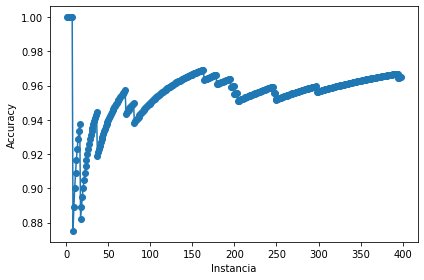

In [7]:
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
X,Y = load_breast_cancer(return_X_y=True)
#print (y_train)
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
N = len(X)
X = np.c_[X, np.ones(N)]

X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# print (X_train)
# for x_i,y in zip(X_train,y_train):
#     print (x_i)
    
ppn = Perceptron (0.1,1)
start_time = time()
ppn.train(X_train,y_train)

ac = accuracy_score(y_test,ppn.predict(x_test,y_test))
print('Accuracy is: ',ac)

elapsed_time = time() - start_time
print("Tiempo de ejecución: %.10f segundos." % elapsed_time)


plt.plot(range(1, len(ppn.accuracy) + 1), ppn.accuracy, marker='o')
plt.xlabel('Instancia')
plt.ylabel('Accuracy')
 
plt.tight_layout()
plt.show()

In [ ]:
class Forgetron:
     def __init__(self,rate,iteraciones):
        self.rate = rate
        self.iteraciones = iteraciones
        
    def train(self,x_train, y_expected):
        self.numAtributes = x_train.shape[1]
        self.weights = np.empty(self.numAtributes)
        #print (self.weights)
        self.accuracy = []
        
        for i in range(self.iteraciones):
            accuracy = 0
            correctos = 0
            cont = 1
            for x_i,y in zip(x_train,y_expected):
                predicted_y = self.calculate_y(x_i)
                if predicted_y != y:
                    if y == 0:
                        y = -1
                    y = self.rate*y 
                    self.weights += y * x_i
                else:
                    correctos +=1
                accuracy = correctos/cont
                self.accuracy.append(accuracy)
                cont+=1
            #print (self.weights)
        return self
    
    ### Prediccion del perceptron para obtener el accuracy con accuracy_score
    def predict(self, x_test,y_test):
        weights = np.transpose(self.weights)
        y_predicted = []
        for x,y in zip(x_test, y_test):
            y_predicted.append(np.where(np.dot(weights,x)>=0.0,1,0))
        return y_predicted
    
    ### A- Funcion que calcula el output de f(x)
    def calculate_y(self,x_train):
        weights = np.transpose(self.weights)
        sum = np.dot(weights,x_train)
        y_predict = np.where(sum>=0.0,1,0)
        return y_predict

In [148]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from time import time
import math

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class Perceptron_V2:
    def __init__(self,rate,iteraciones):
        self.rate = rate
        self.iteraciones = iteraciones
    
    ### I- Perceptron con ajuste para binary cross entropy
    def adjust(self,x_train, y_expected):
        self.numAtributes = x_train.shape[1]
        self.weights = np.zeros(self.numAtributes)
        #print (self.weights)
        self.accuracy = []
        self.loss_list = []


        acc = 0
        correctos = 0
        cont = 1
        for x_i,y in zip(x_train,y_expected):
            predicted_y = self.calculate_y_sigma(x_i)
            #print(predicted_y)
            
            
#             if y == 0:
#                 y = -1
            #y = rate*y 
            self.weights -= self.rate * self.der_loss(x_i, y)
        
            self.loss_list.append(self.loss_function(y, predicted_y))
            
            predicted_y = np.where(predicted_y>=0.5,1,0)
            if predicted_y != y:
                if y == 0:
                    y = -1
            else:
                correctos +=1
            
            acc = correctos/cont
            self.accuracy.append(acc)
            
            cont+=1
        #print (self.weights)
        return self
    
    ### Prediccion del perceptron para obtener el accuracy con accuracy_score
    def predict(self, x_test,y_test):
        weights = np.transpose(self.weights)
        y_predicted = []
        for x,y in zip(x_test, y_test):
            y_predicted.append(np.where(np.dot(weights,x)>=0.0,1,0))
        return y_predicted
    
    ### F- Funcion Sigmoidal
    def sigma(self,epsilon):
        ##MAX exp(x) soportado x=709
        #print(epsilon)
        if -epsilon > 709:
            epsilon = -709
        sum =(1/(1+math.exp(-epsilon)))
        y_predict = np.where(sum>=0.5,1,0)
        return sum
    
    ### Funcion que calcula g(x; w, b)
    def calculate_y_sigma(self,x_train):
        weights = np.transpose(self.weights)
        sum = np.dot(weights,x_train)
        return self.sigma(sum)
    
#     def calculate_y(self,x_train):
#         weights = np.transpose(self.weights)
#         sum = np.dot(weights,x_train)
#         y_predict = np.where(sum>=0.0,1,0)
#         return y_predict
    
    ### G- Calculo funcion loss de g
    def loss_function (self,y,y_predicted):
        if y_predicted == 0:
            log = -8.218407461554972e+307
        else:
            log = math.log(y_predicted)
        if 1-y_predicted == 0:
            log2 = -8.218407461554972e+307
        else :
            log2 = math.log(1-y_predicted)
        return (-y*log)-((1-y)*log2)
    
    ### H- Derivada de la loss
    def der_loss(self,x_i,y_i):
        der_eval = (self.sigma(np.dot(np.transpose(self.weights), x_i))-y_i)*x_i
        return der_eval


Accuracy is:  0.9532163742690059
Tiempo de ejecución: 0.0159525871 segundos.
[0.6931471805599453, 0.691381240157842, 0.6889862461516584, 0.6826409579818083, 0.6910474852611631, 0.68456467270278, 0.6937933621564996, 0.6797697334564473, 0.6841888862951157, 0.6771052061326248, 0.6760449253081487, 0.6806779544621034, 0.6673228815103026, 0.6554863789620403, 0.6097884426451938, 0.6159010251738671, 0.704453101301367, 0.6567287022058428, 0.6742430938707801, 0.6825629565960158, 0.688119372579518, 0.6400114652718317, 0.636010666348485, 0.614576828014695, 0.6000524873950989, 0.6536221643317833, 0.6570275389912972, 0.5308714620018115, 0.5544993499130679, 0.7176238900639266, 0.6759040370164492, 0.573526158875194, 0.5780077909059831, 0.5997638393840127, 0.6469215052539112, 0.5782188013450204, 0.6155678697870068, 0.554662081575592, 0.6169422820132252, 0.6495561777898923, 0.6330126282575833, 0.5445976088252843, 0.6607227931450459, 0.609206279352015, 0.6186306120694549, 0.6536063535466486, 0.6225955758

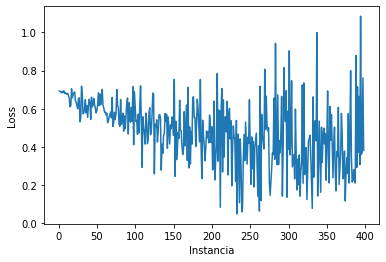

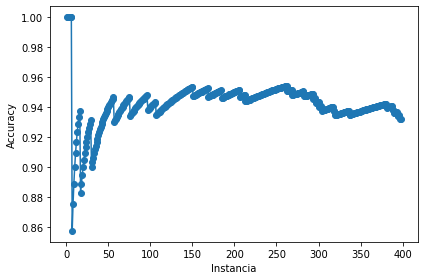

In [160]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
X,Y = load_breast_cancer(return_X_y=True)
#print (y_train)
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
N = len(X)
X = np.c_[X, np.ones(N)]

X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# print (X_train)
# for x_i,y in zip(X_train,y_train):
#     print (x_i)
    
ppn = Perceptron_V2 (0.001,1)
start_time = time()
ppn.adjust(X_train,y_train)

ac = accuracy_score(y_test,ppn.predict(x_test,y_test))
print('Accuracy is: ',ac)

elapsed_time = time() - start_time
print("Tiempo de ejecución: %.10f segundos." % elapsed_time)

print(ppn.loss_list)


plt.plot(range(1, len(ppn.loss_list) + 1), ppn.loss_list, marker='')
plt.xlabel('Instancia')
plt.ylabel('Loss')
 
#plt.tight_layout()
plt.show()

plt.plot(range(1, len(ppn.accuracy) + 1), ppn.accuracy, marker='o')
plt.xlabel('Instancia')
plt.ylabel('Accuracy')
 
plt.tight_layout()
plt.show()